In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 26 16:06:53 2020

@author: Fernando Montenegro
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl


from gurobipy import *

m=Model("vacunas")
#Conjuntos
K=4 #macro-divisiones de la región en estudio
L=[[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20]] #Conjunto de zonas de la macrodivisón
T=20 #Conjunto de periodos máximos a planificar 
P=3 #Conjunto de grupos poblacionales
I=4 #Conjunto de instalaciones fijas para vacunación 
J=5 #Conjunto de centro móviles de vacunación
delta=0.1#Porcentaje mínimo de covertura con centros móviles


f1max=7670
f1min=7012

f2max=35000
f2min=4900

H=[[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]] #conjunto de zonas que se pueden atender en el mismo hospital

MM=1000000# m grande
amb=[350 for i in range(T)]#costo de ambulancia

N={1:[1,2,3],2:[1,2,4],3:[1,3,4,5],4:[2,3,4,5],5:[3,4,5],
   6:[6,7,8],7:[6,7,9],8:[6,9,8,10],9:[7,8,9,10],10:[8,9,10],
   11:[11,12,13],12:[11,12,13,14],13:[11,12,13,15],14:[12,14,15],15:[13,14,15],
   16:[16,17,19],17:[16,17,18,19],18:[17,18,19,20],19:[17,18,19],20:[18,19,20]}

CK=[x for x in range(1,K+1)]
CT=[x for x in range(1,T+1)]
CP=[x for x in range(1,P+1)]
CI=[x for x in range(1,I+1)]
CJ=[x for x in range(1,J+1)]


#parámetros
Po= [[10,220,120],[10,120,153],[20,190,210],[250,239,220],[250,239,220],
    [160,230,144],[164,121,167],[234,218,300],[276,239,212],[301,239,240],
      [182,100,146],[212,200,253],[198,310,215],[145,212,321],[255,249,250],
    [234,321,214],[241,208,145],[122,145,209],[234,145,271],[169,181,161]] #demanda de vacunas en macrodivision segun grupos poblacionales


C=[150,150,150,150] #capacidad de vacunación de centros fijos
D=[37 for i in range(J)] #capacidad de vacunación de centros móviles

A=[1000,1000,1000,1000,1000,
   1000,1000,1000,1000,1000,
   1000,1000,1000,1000,1000,
   1000,1000,1000,1000,1000] #9436 
    #capacidad de abastecimiento

#rg=[[0.30,0.51,0.71], [0.31,0.52,0.72],[0.31,0.52,0.73], [0.32,0.53,0.74], [0.32,0.54,0.75],
 #  [0.33,0.55,0.77], [0.33,0.55,0.78],[0.34,0.56,0.79], [0.34,0.57,0.80], [0.35,0.58,0.81],
  # [0.35,0.59,0.82], [0.36,0.60,0.84], [0.36,0.61,0.85],[0.37,0.62,0.86],[0.38,0.63,0.88],
   #[0.38,0.63,0.89],[0.39,0.64,0.90],[0.39,0.65,0.92],[0.40,0.66,0.93],[0.40,0.67,0.94]] #Índice del nivel de riesgo para el grupo de población en el día

#rg=[[1,2,3], [1,2,3],[1,2,3], [1,2,3], [1,2,3],
 #  [2,3,4], [2,3,4],[2,3,4], [2,3,4], [2,3,4],
  # [3,4,5], [3,4,5], [3,4,5],[3,4,5],[3,4,5],
   #[4,5,6],[4,5,6],[4,5,6],[4,5,6],[4,5,6]]

rg=[[0.21,0.51,0.73], [0.22,0.53,0.74],[0.24,0.54,0.75], [0.25,0.55,0.76], [0.27,0.57,0.78],
   [0.28,0.58,0.79], [0.30,0.59,0.80],[0.32,0.61,0.81], [0.34,0.62,0.82], [0.36,0.64,0.84],
   [0.38,0.66,0.85], [0.40,0.67,0.86], [0.43,0.69,0.87],[0.45,0.71,0.89],[0.48,0.72,0.90],
   [0.51,0.74,0.91],[0.54,0.76,0.93],[0.57,0.78,0.94],[0.61,0.80,0.96],[0.64,0.82,0.97]]

Academic license - for non-commercial use only - expires 2022-06-20
Using license file C:\Users\famd_\gurobi.lic


In [2]:
#gurobipy.gurobi.version()

In [3]:
#diccionario de parámetros

drg={}
for i in range(len(rg)):
    for j in range(len(rg[0])):
        drg[(i+1,j+1)]=rg[i][j]
  
dPo={}
for k in CK:  
    for i in L[k-1]:
       for p in CP:
            dPo[(i,p)]=Po[i-1][p-1]

dH={}
for i in range(len(H)):
    for j in range(len(H[0])):
        dH[(i+1,j+1)]=H[i][j]

damb={}
for k in CK:  
    for i in L[k-1]:
        damb[i]=amb[i-1]
        


dD=dict(zip(CJ,D))
dC=dict(zip(CI,C))


t:  1  of  20
t:  2  of  20
t:  3  of  20
t:  4  of  20
t:  5  of  20
t:  6  of  20
t:  7  of  20
t:  8  of  20
t:  9  of  20
t:  10  of  20
t:  11  of  20
t:  12  of  20
t:  13  of  20
t:  14  of  20
t:  15  of  20
t:  16  of  20
t:  17  of  20
t:  18  of  20
t:  19  of  20
t:  20  of  20
Changed value of parameter timelimit to 1800.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.001
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter Cuts to 3
   Prev: -1  Min: -1  Max: 3  Default: -1
alpha:  0.6
Changed value of parameter LogFile to 0.6_ex1.log
   Prev:   Default: 
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 17220 rows, 19048 columns and 88460 nonzeros
Model fingerprint: 0x64e79ebb
Variable types: 11048 continuous, 8000 integer (8000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objectiv

1.0 el día: 6 atiende el barrio 17 recurso: 3
1.0 el día: 1 atiende el barrio 17 recurso: 4
1.0 el día: 1 atiende el barrio 17 recurso: 4
1.0 el día: 1 atiende el barrio 17 recurso: 4
1.0 el día: 4 atiende el barrio 17 recurso: 4
1.0 el día: 4 atiende el barrio 17 recurso: 4
1.0 el día: 4 atiende el barrio 17 recurso: 4
1.0 el día: 5 atiende el barrio 17 recurso: 4
1.0 el día: 5 atiende el barrio 17 recurso: 4
1.0 el día: 5 atiende el barrio 17 recurso: 4
1.0 el día: 8 atiende el barrio 17 recurso: 4
1.0 el día: 8 atiende el barrio 17 recurso: 4
1.0 el día: 8 atiende el barrio 17 recurso: 4
1.0 el día: 2 atiende el barrio 17 recurso: 5
1.0 el día: 2 atiende el barrio 17 recurso: 5
1.0 el día: 2 atiende el barrio 17 recurso: 5
1.0 el día: 4 atiende el barrio 17 recurso: 5
1.0 el día: 4 atiende el barrio 17 recurso: 5
1.0 el día: 4 atiende el barrio 17 recurso: 5
1.0 el día: 5 atiende el barrio 17 recurso: 5
1.0 el día: 5 atiende el barrio 17 recurso: 5
1.0 el día: 5 atiende el barrio 17

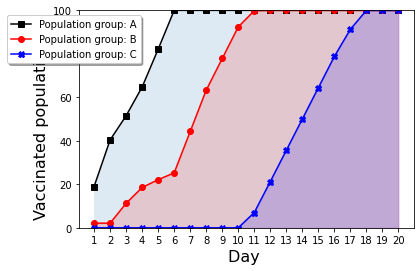

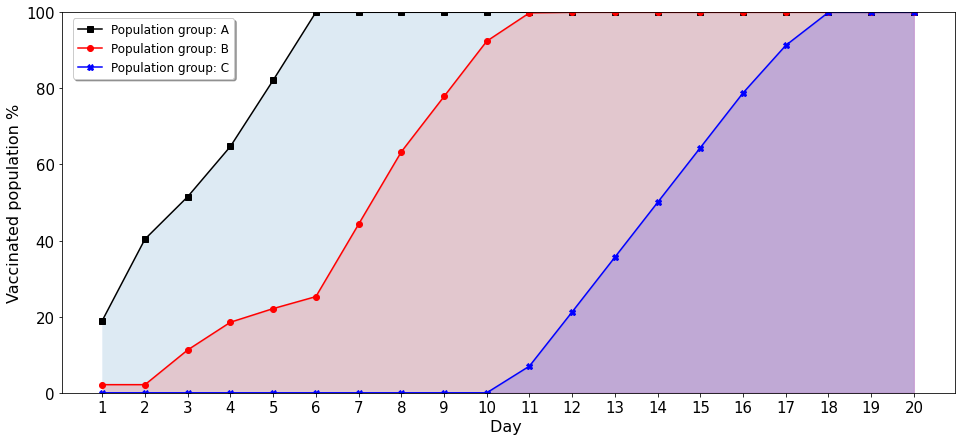

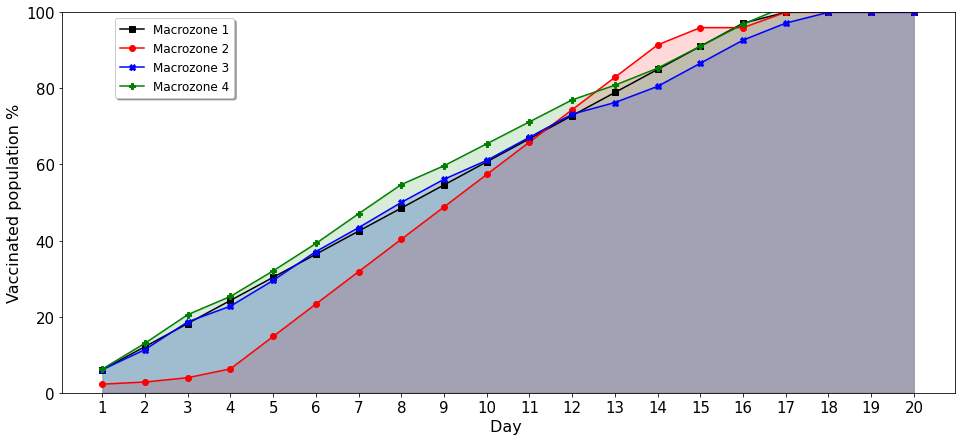

{1: 150.0, 2: 150.0, 3: 150.0, 4: 150.0, 5: 150.0, 6: 150.0, 7: 150.0, 8: 150.0, 9: 150.0, 10: 150.0, 11: 150.0, 12: 150.0, 13: 150.0, 14: 150.0, 15: 150.0, 16: 150.0, 17: 71.0, 18: 0.0, 19: 0.0, 20: 0.0}
{1: 150.0, 2: 150.0, 3: 150.0, 4: 150.0, 5: 150.0, 6: 150.0, 7: 150.0, 8: 150.0, 9: 150.0, 10: 150.0, 11: 150.0, 12: 150.0, 13: 150.0, 14: 150.0, 15: 150.0, 16: 150.0, 17: 71.0, 18: 0.0, 19: 0.0, 20: 0.0}
{1: 150.0, 2: 150.0, 3: 150.0, 4: 150.0, 5: 150.0, 6: 150.0, 7: 150.0, 8: 150.0, 9: 150.0, 10: 150.0, 11: 150.0, 12: 150.0, 13: 150.0, 14: 150.0, 15: 150.0, 16: 150.0, 17: 71.0, 18: 0.0, 19: 0.0, 20: 0.0}
     day     h1     h2     h3
1    1.0  150.0  150.0  150.0
2    2.0  150.0  150.0  150.0
3    3.0  150.0  150.0  150.0
4    4.0  150.0  150.0  150.0
5    5.0  150.0  150.0  150.0
6    6.0  150.0  150.0  150.0
7    7.0  150.0  150.0  150.0
8    8.0  150.0  150.0  150.0
9    9.0  150.0  150.0  150.0
10  10.0  150.0  150.0  150.0
11  11.0  150.0  150.0  150.0
12  12.0  150.0  150.0  1

In [4]:
setSol = {}
sqp=[0.6]
for mm in sqp:
    jjj=mm
    #jjj=0.8
    #variables
    xf={}#personas vacunadas por el equipo fijo en los barrios
    pxf={}
    for k in CK:
        for l in L[k-1]:
            for p in CP:
                for i in CI:
                    for t in CT:
                        xf[l,p,i,t]=m.addVar(vtype=GRB.CONTINUOUS, lb=0 ,name="xf[%s,%s,%s,%s]"%(l,p,i,t))

    qm={}#personas vacunadas por el equipo movil en la macrozona
    pqm={}
    for k in CK:
        for p in CP:
            for j in CJ:
                qm[k,p,j]=m.addVar(vtype=GRB.CONTINUOUS, lb=0 ,name="qm[%s,%s,%s]"%(k,p,j))

    pxm={}
    xm={}#personas vacunadas por el equipo movil en los barrios
    for k in CK:
        for l in L[k-1]:
            for p in CP:
                for j in CJ:
                    for t in CT:
                        xm[l,p,j,t]=m.addVar(vtype=GRB.CONTINUOUS, lb=0 ,name="xm[%s,%s,%s,%s]"%(l,p,j,t))                             

    pqf={}#personas vacunadas por el equipo fijo en la macrozona
    qf={}
    for k in CK:
        for p in CP:
            for i in CI:
                qf[k,p,i]=m.addVar(vtype=GRB.CONTINUOUS, lb=0 ,name="qf[%s,%s,%s]"%(k,p,i))


    y={}# indica si el movil se ha posicionado en alguna de las zonas
    for k in CK:
        for r in L[k-1]:
            for j in CJ:    
                for t in CT:
                      y[r,j,t]=m.addVar(vtype=GRB.BINARY, lb=0 ,name="y[%s,%s,%s]"%(r,j,t))

    v={}# indica qué población atiende el equipo movil
    for k in CK:
        for l in L[k-1]:
            for j in CJ:
                for t in CT:
                    for p in CP:
                        v[l,j,t,p]=m.addVar(vtype=GRB.BINARY, lb=0 ,name="v[%s,%s,%s,%s]"%(l,j,t,p))
    sol={}
    for t in CT:
        for p in CP:
            sol[t,p]=m.addVar(vtype=GRB.CONTINUOUS, lb=0 ,name="sol[%s,%s]"%(t,p))

    z={}# cantidad de vacunas asignadas a la población k
    for k in CK:
        for t in CT:
            z[k,t]=m.addVar(vtype=GRB.CONTINUOUS, lb=0 ,name="z[%s,%s]"%(k,t))    
    #w={}#
    #for j in CJ:
    #   w[j]=m.addVar(vtype=GRB.BINARY, lb=0 ,name="w[%s]"%(j))


    m.update()

    #Restricciones
    #2)calculamos las personas por macrozonas
    #m.addConstr(quicksum(xf[l,p,i,t] for (l,p,i,t) in xf )==
     #       quicksum(qf[k,p,i] for (k,p,i) in qf )) 


    #3)calculamos las personas por macrozonas
    #m.addConstr(quicksum(xm[l,p,j,t] for (l,p,j,t) in xm )==
     #       quicksum(qm[k,p,j] for (k,p,j) in qm))

    #4)Balance de vacunas diarias entregadas desde centro de distribución a la macroregión (comunas en nuestro caso)
    #for t in CT:
     #   m.addConstr(quicksum(z[k,t] for k in CK if (k,t) in z)<=
      #              A[t-1])

    #5)Balance de vacunas desde la macroregión a la zonas (dentro de ellas)
    #for k in CK:
     #   m.addConstr(quicksum(qf[k,p,i] for (k1,p,i) in qf if k1==k )+
      #              quicksum(qm[k,p,j] for (k1,p,j) in qm if k1==k )==
       #             quicksum(z[k,t] for (k1,t) in z if k1==k) )
        
    #4)restricción
    for t in CT:
        print('t: ', str(t), ' of ', str(len(CT)))
        #4)Balance de vacunas diarias entregadas desde centro de distribución a la macroregión (comunas en nuestro caso)
        #m.addConstr(quicksum(z[k,t] for k in CK if (k,t) in z)<= A[t])
        m.addConstr(quicksum(xf[l,p,i,t] for (l,p,i,t1) in 
                         xf if t1==t)
                +quicksum(xm[l,p,j,t] for (l,p,j,t1) in
                          xm if t1==t)<=A[t-1])

    #6)Población de cada zona debe ser atendida 
    for k in CK:
        for l in L[k-1]:
            for p in CP:
                m.addConstr(quicksum(xf[l,p,i,t] for (l1,p1,i,t) in 
                                     xf if l1==l and p1==p)
                            +quicksum(xm[l,p,j,t] for (l1,p1,j,t) in
                                      xm if l1==l and p1==p)>= 
                                                    dPo[l,p])

    #7)capacidad de vacunatorios móviles
    for t in CT:
        for j in CJ:
            m.addConstr(quicksum(xm[l,p,j,t] for (l,p,j1,t1) in xm if j1==j and t1==t)<=dD[j])

    #8)capacidad de vacunatorios fijos
    for i in CI:
        for t in CT:
            m.addConstr(quicksum(xf[l,p,i,t] for (l,p,i1,t1) in xf if i1==i and t1==t)<=dC[i])    

    #9)cantidad de vacunatorios móviles
    #for j in CJ:
    #   for t in CT:
    #      for k in CK:
    #        m.addConstr(quicksum(y[r,j,t] for r in L[k-1])<=w[j])


    #Restricciones de localización de vacunatorios móviles (máxima cobertura considerando zonas adyacentes)
    #10)restricción
    for t in CT:
        for k in CK:
            for l in L[k-1]:
                for j in CJ:
                    for p in CP:
                        m.addConstr(quicksum(y[r,j1,t1] for (r,j1,t1) in y if r in N[l] and j1==j and t1==t)>=v[l,j,t,p])                                



    #Se permite vacunar gente a través de un vacunatorio móvil siempre y cuando se encuentre en los barrios cubiertos por él
    #11)restricción
    for k in CK:
        for l in L[k-1]:
            for p in CP:
                for j in CJ:
                    for t in CT:
                        m.addConstr(xm[l,p,j,t] <= v[l,j,t,p]*dPo[l,p])


    #se decide que se debe instalar a lo más en un barrio por día
    #12)restricción
    for j in CJ:
        for t in CT:
            m.addConstr(quicksum(y[r,j,t] for (r,j1,t1) in y if j1==j and t1==t)<=1)

    #se busca permite que las personas se vacunen en zonas adyacentes a sus barrios
    for k in CK:
        for l in L[k-1]:
            for p in CP:
                for i in CI:
                    for t in CT:
                        m.addConstr(xf[l,p,i,t] <= dH[i,l]*10000)

    #se busca una mínima covertura a través de los vacunatorios móviles

    #m.addConstr(quicksum(xm[l,p,j,t] for (l,p,j,t) in xm)>=delta*quicksum(dPo[l,p] for (l,p) in dPo))
    
    # suma de la función objetivo
    for t in CT:
        for p in CP:
            m.addConstr(quicksum(xm[l,p,j,t] for (l,p1,j,t1) in xm if p1==p and t1==t) + 
                        quicksum(xf[s,p,i,t] for (s,p1,i,t1) in xf if p1==p and t1==t)==sol[t,p])

    fo1=quicksum(sol[t,p]*drg[t,p] for (t,p) in sol) #función objetivo1  
    fo2=quicksum(damb[l]*y[l,j,t]  for (l,j,t) in y) #función objetivo2

    fn1=(fo1-f1min)/(f1max-f1min)
    fn2=(fo2-f2min)/(f2max-f2min)
    #fo3=quicksum(u[l,t,p] for (l,t,p) in u)#función objetivo3
    #setObjectiveN ( expr, index, priority=0, weight=1, abstol=0, reltol=0, name="" )



    m.Params.ObjNumber  = 2
    m.Params.timelimit=1800
    m.Params.MIPGap=0.001
    m.Params.Cuts=3
    m.ModelSense=1 #minimization 
    #m.tune()     
    m.setObjectiveN(fn1, 0, weight=jjj, name="f1")
    m.setObjectiveN(fn2, 1, weight=1-jjj, name="f2")
    #m.setObjectiveN(fo3, 2, 1, name="f3")



    print('alpha: ', jjj)


    m.Params.LogFile=str(jjj)+'_ex1.log'
    m.update()

    m.optimize()
    m.write(str(jjj)+"_exp1.sol")
    gv = m.getVars()
    names = m.getAttr('VarName', gv)
    for i in range(m.SolCount):
        m.params.SolutionNumber = i
        xn = m.getAttr('Xn', gv)
        lines = ["{} {}".format(v1, v2) for v1, v2 in zip(names, xn)]
        with open('{}_{}.sol'.format(m.ModelName, i+jjj), 'w') as f:
            f.write("# Solution for model {}\n".format(m.modelName))
            f.write("# Objective value = {}\n".format(m.PoolObjVal))
            f.write("\n".join(lines))

    #m.discardMultiobjEnvs()
    Time_r=m.Runtime


    nSolutions = m.SolCount
    population=sum(sol[t,p].x for (t,p) in sol)

    #m.status = GRB.Status.OPTIMAL    
    #if m.status == GRB.Status.OPTIMAL:    
    if True:
        # Query number of multiple objectives, and number of solutions
        nSolutions  = m.SolCount
        nObjectives = m.NumObj

        for s in range(nSolutions):
         # Set which solution we will query from now on
          m.params.SolutionNumber = s
        # Print objective value of this solution in each objective
        # print('Solution', s, ':', end='')
        for o in range(nObjectives):
        # Set which objective we will query
            m.params.ObjNumber = o
        # Query the o-th objective value
            #print(' ',m.ObjNVal, end='')


        nObjectives = m.NumObj
        #print('Problem has', nObjectives, 'objectives')
        for o in range(nObjectives):
        # Set which objective we will query
            m.params.ObjNumber = o

        # query the full vector of the o-th solution
        #assert m.Status == GRB.Status.OPTIMAL

        # Query number of multiple objectives, and number of solutions
        nSolutions  = m.SolCount
        nObjectives = m.NumObj

    solutions = []


    gaps=[]
    soluciones={}
    sal=[]
    sal = np.zeros((nSolutions, nObjectives))
    for s in range(nSolutions):
    # Set which solution we will query from now on
        m.params.SolutionNumber = s

        # Print objective value of this solution in each objective
        #print('Solution', s, ':', end='')
        for o in range(nObjectives):
            i=o
        # Set which objective we will query
            m.params.ObjNumber = o
        # Query the o-th objective value
            soluciones[(s+1,i+1)]=m.ObjNVal 
            sal[s-1][i-1]=m.ObjNVal

    pas={} # se cálcula la cantidad de personas efectivmente vacunadas tanto en hospitales como ambulancias
    print('Cantidad de personas vacunadas según grupo de riesgo' )
    for k in CK:
        for l in L[k-1]:
            for p in CP:
                pas[l,p]=sum(xf[l,p,i,t].x for (l1,p1,i,t) in xf if l1==l and p1==p)+ sum(xm[l,p,j,t].x for (l1,p1,j,t) in xm if l1==l and p1==p)

    #for p in CP:
     #   for k in CK:
      #      for l in L[k-1]:   
                #print('Barrio:',l, ', Paciente:',p, 'Cantidad:', float(pas[l,p]))

    totalbarrio={}#vacunados por barrios
    totaldembar={}#demanda por barrios
    nivelser={}#nivel de servicio
    totalvac=0 #vacunas entregadas al sistema 
    for t in CT:
        totalvac=totalvac+ A[t-1]

    totalpob=0
    for k in CK:  
        for i in L[k-1]:
           for p in CP:
            totalpob=totalpob+dPo[(i,p)] #cálculamos la cantidad de personas dísponibles a vacunar
    print('Vacunas totales :', totalvac )
    print('Población total:', totalpob)
    totalvacunados=0
    totalvacunados=sum(pas[l,p] for (l,p) in pas)#calculamos las personas realmente vacunadas
    print('Personas vacunadas: ', totalvacunados)

    print('Porcentaje de cobertura campaña:', round(100*(totalvac/totalpob),2),'%')
    for k in CK:
        for l in L[k-1]:
            totalbarrio[l]=sum(pas[l,p] for (l1,p) in pas if l1==l)
            totaldembar[l]=sum(dPo[l,p] for (l1,p) in dPo if l1==l)
            print('Porcentaje vacunados por barrio',l,':',round(100*(totalbarrio[l]/totaldembar[l]),2),'%')
            nivelser[l]=round(100*(totalbarrio[l]/totaldembar[l]),2)

    import pandas as pd
    data0 = pd.DataFrame(columns=( 'f1','f2'))

    for i in range(len(sal)):
        for j in range(len(sal[0])):
            data0.loc[i]=[ soluciones[i+1,1],soluciones[i+1,2]] 


    print(data0)
    va={}
    for k in CK:
        for l in L[k-1]:
            for j in CJ:
                for t in CT:
                    for p in CP:
                         va[l,j,t,p]=v[l,j,t,p].x

    xfa={}
    for k in CK:
        for l in L[k-1]:
            for p in CP:
                for i in CI:
                    for t in CT:
                        xfa[l,p,i,t]=xf[l,p,i,t].x
    #calculo de atención por hospitales
    hos1={}
    hos2={}
    hos3={}
    amb1={}
    amb2={}
    amb3={}
    amb4={}
    amb5={}
    amb6={}
    amb7={}
    amb8={}
    amb9={}
    amb10={}



    for tt in range(1,T+1):
        hos1[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==1)),2)
    #print(hos1)

    for tt in range(1,T+1):
        hos2[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==2)),2)
    #print(hos1)

    for tt in range(1,T+1):
        hos3[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==3)),2)
    #print(hos1)

    for tt in range(1,T+1):
        amb1[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==1)),2)
    #print(amb1)
    for tt in range(1,T+1):
        amb2[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==2)),2)
    #print(amb2)
    for tt in range(1,T+1):
        amb3[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==3)),2)
    #print(amb3)
    for tt in range(1,T+1):
        amb4[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==4)),2)
    #print(amb4)
    for tt in range(1,T+1):
        amb5[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==5)),2)
    #print(amb5)
    for tt in range(1,T+1):
        amb6[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==6)),2)
    #print(amb6)
    for tt in range(1,T+1):
        amb7[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==7)),2)
    #print(amb7)
    for tt in range(1,T+1):
        amb8[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==8)),2)
    #print(amb8)



    import pandas as pd
    data2 = pd.DataFrame(columns=( 'day','h1', 'h2', 'h3','ab1','ab2','ab3','ab4','ab5','ab6','ab7','ab8'))

    for t in CT:
        data2.loc[t]=[t,hos1[t],hos2[t],hos3[t],amb1[t],amb2[t],amb3[t],amb4[t],amb5[t],amb6[t],amb7[t],amb8[t]] 
    print(data2)

    ya={}
    for k in CK:
        for r in L[k-1]:
            for j in CJ:    
                for t in CT:
                    ya[(r,j,t)]=y[r,j,t].x
                    if y[r,j,t].x>0:
                        print(y[r,j,t].x,'dia:',t,'recurso:',j,'barrio:',r)

    for k in CK:
        for l in L[k-1]:
            for j in CJ:
                for t in CT:
                    for p in CP:
                        if v[l,j,t,p].x>0:
                            print(v[l,j,t,p].x, 'el día:',t, 'atiende el barrio',l ,'recurso:',j )
                            
    dia_xa={}
    dia_xb={}
    dia_xc={}
    for tt in range(1,T+1):
        dia_xa[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and p==1)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and p==1))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if p==1)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if p==1)),2)
    print(dia_xa)

    for tt in range(1,T+1):
        dia_xb[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and p==2)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and p==2))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if p==2)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if p==2)),2)
    print(dia_xb)

    for tt in range(1,T+1):
        dia_xc[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and p==3)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and p==3))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if p==3)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if p==3)),2)
    print(dia_xc)


    import pandas as pd
    data = pd.DataFrame(columns=( 'day','A', 'B', 'C'))

    for t in CT:
        data.loc[t]=[t,dia_xa[t],dia_xb[t],dia_xc[t]] 
    print(data)
    dia_q1={}
    dia_q2={}
    dia_q3={}
    dia_q4={}
    for tt in range(1,T+1):
        dia_q1[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and l<=5)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and l<=5))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if l<=5)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if l<=5)),2)
    print(dia_q1)

    for tt in range(1,T+1):
        dia_q2[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and l<5 and l<=10)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and l<5 and l<=10))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if l<5 and l<=10)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if l<5 and l<=10)),2)
    print(dia_q2)

    for tt in range(1,T+1):
        dia_q3[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and l<10 and l<=15)+
                              sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and l<10 and l<=15))/
                         (sum(xf[l,p,i,t].x for (l,p,i,t) in xf if l<10 and l<=15)+
                          sum(xm[l,p,j,t].x for (l,p,j,t) in xm if l<10 and l<=15)),2)
    #print(dia_q3)
    for tt in range(1,T+1):
        dia_q4[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and l<15)+
                              sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and l<15))/
                         (sum(xf[l,p,i,t].x for (l,p,i,t) in xf if l<15)+
                          sum(xm[l,p,j,t].x for (l,p,j,t) in xm if l<10)),2)


    import pandas as pd
    data1 = pd.DataFrame(columns=( 'day','k1', 'k2', 'k3','k4'))

    for t in CT:
        data1.loc[t]=[t,dia_q1[t],dia_q2[t],dia_q3[t],dia_q4[t]] 
    print(data1)
    fig = plt.figure()
    x = data['day']
    y = data['A']
    y2 = data['B']
    y3 = data['C']
   
    #error =data['dev std 7']
    #error2 = data['dev std 14']
    #error3 = data['dev std 21']
    pl.plot(x, y, 'k-', label = 'Population group: A',marker="s")
    pl.legend()
    pl.fill_between(x, y-0, alpha = 0.15)
    pl.plot(x, y2, 'k-', label = 'Population group: B', color = 'red',marker="o")
    pl.fill_between(x, y2-0, alpha = 0.15, color = 'red')
    pl.plot(x, y3, 'k-', label = 'Population group: C', color = 'blue',marker="X")
    pl.fill_between(x, y3-0, alpha = 0.15, color='blue')
    
    
    my_xticks = [i for i in range(1,21)] 
    plt.xticks(x, my_xticks)
    plt.ylim(0,100)
    plt.rcParams['figure.figsize'] = [16,7]
    pl.rc('xtick', labelsize=15) 
    pl.rc('ytick', labelsize=15) 
    plt.xlabel('Day ', fontsize=16)
    plt.ylabel('Vaccinated population %', fontsize=16)
    params = {'legend.fontsize': 12,
              'legend.handlelength': 2}
    pl.legend(loc='upper right', bbox_to_anchor=(0.2, 1.00), shadow=True, ncol=1)
    plt.rcParams.update(params)
    pl.show()


    #plt.figure(figsize=(14,7))
    fig = plt.figure()
    x = data['day']
    y = data['A']
    y2 = data['B']
    y3 = data['C']
    
    #error =data['dev std 7']
    #error2 = data['dev std 14']
    #error3 = data['dev std 21']
    pl.plot(x, y, 'k-', label = 'Population group: A',marker="s")
    pl.legend()
    pl.fill_between(x, y-0, alpha = 0.15)
    pl.plot(x, y2, 'k-', label = 'Population group: B', color = 'red',marker="o")
    pl.fill_between(x, y2-0, alpha = 0.15, color = 'red')
    pl.plot(x, y3, 'k-', label = 'Population group: C', color = 'blue',marker="X")
    pl.fill_between(x, y3-0, alpha = 0.15, color='blue')
   
    
    my_xticks = [i for i in range(1,21)] 
    plt.xticks(x, my_xticks)
    plt.ylim(0,100)
    plt.rcParams['figure.figsize'] = [16,7]
    pl.rc('xtick', labelsize=15) 
    pl.rc('ytick', labelsize=15) 
    plt.xlabel('Day ', fontsize=16)
    plt.ylabel('Vaccinated population %', fontsize=16)
    params = {'legend.fontsize': 12,
              'legend.handlelength': 2}
    pl.legend(loc='upper right', bbox_to_anchor=(0.2, 1.00), shadow=True, ncol=1)
    plt.rcParams.update(params)
    pl.show()


    fig = plt.figure()
    x = data1['day']
    y = data1['k1']
    y2 = data1['k2']
    y3 = data1['k3']
    y4=data1['k4']



    pl.plot(x, y, 'k-', label = 'Macrozone 1',marker="s")
    pl.legend()
    pl.fill_between(x, y-0, alpha = 0.15)
    pl.plot(x, y2, 'k-', label = 'Macrozone 2', color = 'red',marker="o")
    pl.fill_between(x, y2-0, alpha = 0.15, color = 'red')
    pl.plot(x, y3, 'k-', label = 'Macrozone 3', color = 'blue',marker="X")
    pl.fill_between(x, y3-0, alpha = 0.15, color='blue')
    pl.plot(x, y4, 'k-', label = 'Macrozone 4', color = 'green',marker="P")
    pl.fill_between(x, y4-0, alpha = 0.15, color='green')
    
    my_xticks = [i for i in range(1,21)] 
    plt.xticks(x, my_xticks)
    plt.ylim(0,100)
    plt.rcParams['figure.figsize'] = [16,7]
    pl.rc('xtick', labelsize=10) 
    pl.rc('ytick', labelsize=10) 
    plt.xlabel('Day ', fontsize=16)
    plt.ylabel('Vaccinated population %', fontsize=16)
    params = {'legend.fontsize': 12,
              'legend.handlelength': 2}
    pl.legend(loc='upper right', bbox_to_anchor=(0.2, 1.00), shadow=True, ncol=1)
    plt.rcParams.update(params)
    pl.show()
    
    
    
        #calculo de atención por hospitales
    hos1={}
    hos2={}
    hos3={}

    for tt in range(1,T+1):
        hos1[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==1)),0)
    print(hos1)

    for tt in range(1,T+1):
        hos2[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==2)),0)
    print(hos1)

    for tt in range(1,T+1):
        hos3[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==3)),0)
    print(hos1)



    import pandas as pd
    data2 = pd.DataFrame(columns=( 'day','h1', 'h2', 'h3'))

    for t in CT:
        data2.loc[t]=[t,hos1[t],hos2[t],hos3[t]] 
    print(data2)
    from openpyxl import Workbook

    #workbook_name="Hoja1.xlsx"
    #wb = load_workbook(workbook_name)
    wb = Workbook()
    ws1 = wb.create_sheet("F.O's")
    ws2 = wb.create_sheet("Plan_vacunación")
    ws3 = wb.create_sheet("Plan_móvil")
    ws4 = wb.create_sheet("Plan_fijo")
    ws5 = wb.create_sheet("Tiempo_Gap")
    
    #guardando el valor de las f.o's en excel

    for i in range(len(sal)):
        for j in range(len(sal[0])):
                ws1.cell(row = 1, column = 1, value = "f1")
                ws1.cell(row = i+2, column = 1, value = soluciones[i+1,1])
                ws1.cell(row = 1, column = 2, value = "f2")
                ws1.cell(row = i+2, column = 2, value = soluciones[i+1,2])
    #plan de vacunación
    for t in CT:
        ws2.cell(row = 1, column = 1, value = "día")
        ws2.cell(row = t+1, column = 1, value = t)
        ws2.cell(row = 1, column = 2, value = "CF1")
        ws2.cell(row = t+1, column = 2, value = hos1[t])
        ws2.cell(row = 1, column = 3, value = "CF2")
        ws2.cell(row = t+1, column = 3, value = hos2[t])
        ws2.cell(row = 1, column = 4, value = "CF3")
        ws2.cell(row = t+1, column = 4, value = hos3[t])
        ws2.cell(row = 1, column = 5, value = "CM1")
        ws2.cell(row = t+1, column = 5, value = amb1[t])             
        ws2.cell(row = 1, column = 6, value = "CM2") 
        ws2.cell(row = t+1, column = 6, value = amb2[t]) 
        ws2.cell(row = 1, column = 7, value = "CM3")
        ws2.cell(row = t+1, column = 7, value = amb3[t]) 
        ws2.cell(row = 1, column = 8, value = "CM4")             
        ws2.cell(row = t+1, column = 8, value = amb4[t] )    
        ws2.cell(row = 1, column = 9, value = "CM5") 
        ws2.cell(row = t+1, column = 9, value = amb5[t])
        ws2.cell(row = 1, column = 10, value = "CM6")
        ws2.cell(row = t+1, column = 10, value = amb6[t])
        ws2.cell(row = 1, column = 11, value = "CM7")
        ws2.cell(row = t+1, column = 11, value = amb7[t])
        ws2.cell(row = 1, column = 12, value = "CM8")
        ws2.cell(row = t+1, column = 12, value = amb8[t])
    
    #plan de vacunación móvil
    cont=1
    for k in CK:
        for r in L[k-1]:
            for j in CJ:    
                for t in CT:
                    if ya[r,j,t]>0:
                        cont=cont+1   
                        ws3.cell(row = 1, column = 1, value = "Día")
                        ws3.cell(row = 1, column = 2, value = "Centro Móvil")
                        ws3.cell(row = 1, column = 3, value = "Se instala en") 
                        ws3.cell(row = cont+1, column = 1, value = t)
                        ws3.cell(row = cont+1, column = 2, value = j)
                        ws3.cell(row = cont+1, column = 3, value = r)
    cont=1
    for k in CK:
        for l in L[k-1]:
            for j in CJ:
                for t in CT:
                    for p in CP:
                        if va[l,j,t,p]>0:
                            cont=cont+1

                            ws3.cell(row = 1, column = 4, value = "Día")
                            ws3.cell(row = 1, column = 5, value = "Centro Móvil")
                            ws3.cell(row = 1, column = 6, value = "Barrio")
                            ws3.cell(row = 1, column = 7, value = "Grupo")

                            ws3.cell(row = cont+1, column = 4, value = t)
                            ws3.cell(row = cont+1, column = 5, value = j)
                            ws3.cell(row = cont+1, column = 6, value = l)
                            ws3.cell(row = cont+1, column = 7, value = p)
                            
    cont=1
    for k in CK:
        for l in L[k-1]:
            for p in CP:
                for i in CI:
                    for t in CT:
                        if xfa[l,p,i,t]>0:
                            cont=cont+1
                            ws4.cell(row = 1, column = 1, value = "Día")
                            ws4.cell(row = 1, column = 2, value = "CF")
                            ws4.cell(row = 1, column = 3, value = "Barrio")
                            ws4.cell(row = 1, column = 4, value = "Grupo")
                            ws4.cell(row = 1, column = 5, value = "Cantidad")

                            ws4.cell(row = cont+1, column = 1, value = t)
                            ws4.cell(row = cont+1, column = 2, value = i)
                            ws4.cell(row = cont+1, column = 3, value = l)
                            ws4.cell(row = cont+1, column = 4, value = p)
                            ws4.cell(row = cont+1, column = 5, value = xfa[l,p,i,t])
    
    ws5.cell(row = 2, column = 2, value = "Tiempo")
    ws5.cell(row = 3, column = 2, value = Time_r)
    # Save the file
    namexl="compacto"+str(jjj)+".xlsx"
    wb.save(namexl)




    
    

### 

In [5]:
pas={} # se cálcula la cantidad de personas efectivmente vacunadas tanto en hospitales como ambulancias
print('Cantidad de personas vacunadas según grupo de riesgo' )
for k in CK:
    for l in L[k-1]:
        for p in CP:
            pas[l,p]=sum(xf[l,p,i,t].x for (l1,p1,i,t) in xf if l1==l and p1==p)+ sum(xm[l,p,j,t].x for (l1,p1,j,t) in xm if l1==l and p1==p)

#for p in CP:
 #   for k in CK:
  #      for l in L[k-1]:   
            #print('Barrio:',l, ', Paciente:',p, 'Cantidad:', float(pas[l,p]))

totalbarrio={}#vacunados por barrios
totaldembar={}#demanda por barrios
nivelser={}#nivel de servicio
totalvac=0 #vacunas entregadas al sistema 
for t in CT:
    totalvac=totalvac+ A[t-1]

totalpob=0
for k in CK:  
    for i in L[k-1]:
       for p in CP:
        totalpob=totalpob+dPo[(i,p)] #cálculamos la cantidad de personas dísponibles a vacunar
print('Vacunas totales :', totalvac )
print('Población total:', totalpob)
totalvacunados=0
totalvacunados=sum(pas[l,p] for (l,p) in pas)#calculamos las personas realmente vacunadas
print('Personas vacunadas: ', totalvacunados)

print('Porcentaje de cobertura campaña:', round(100*(totalvac/totalpob),2),'%')
for k in CK:
    for l in L[k-1]:
        totalbarrio[l]=sum(pas[l,p] for (l1,p) in pas if l1==l)
        totaldembar[l]=sum(dPo[l,p] for (l1,p) in dPo if l1==l)
        print('Porcentaje vacunados por barrio',l,':',round(100*(totalbarrio[l]/totaldembar[l]),2),'%')
        nivelser[l]=round(100*(totalbarrio[l]/totaldembar[l]),2)

import pandas as pd
data0 = pd.DataFrame(columns=( 'f1','f2'))

for i in range(len(sal)):
    for j in range(len(sal[0])):
        data0.loc[i]=[ soluciones[i+1,1],soluciones[i+1,2]] 


print(data0)

Cantidad de personas vacunadas según grupo de riesgo
Vacunas totales : 20000
Población total: 11964
Personas vacunadas:  11963.999999999989
Porcentaje de cobertura campaña: 167.17 %
Porcentaje vacunados por barrio 1 : 100.0 %
Porcentaje vacunados por barrio 2 : 100.0 %
Porcentaje vacunados por barrio 3 : 100.0 %
Porcentaje vacunados por barrio 4 : 100.0 %
Porcentaje vacunados por barrio 5 : 100.0 %
Porcentaje vacunados por barrio 6 : 100.0 %
Porcentaje vacunados por barrio 7 : 100.0 %
Porcentaje vacunados por barrio 8 : 100.0 %
Porcentaje vacunados por barrio 9 : 100.0 %
Porcentaje vacunados por barrio 10 : 100.0 %
Porcentaje vacunados por barrio 11 : 100.0 %
Porcentaje vacunados por barrio 12 : 100.0 %
Porcentaje vacunados por barrio 13 : 100.0 %
Porcentaje vacunados por barrio 14 : 100.0 %
Porcentaje vacunados por barrio 15 : 100.0 %
Porcentaje vacunados por barrio 16 : 100.0 %
Porcentaje vacunados por barrio 17 : 100.0 %
Porcentaje vacunados por barrio 18 : 100.0 %
Porcentaje vacuna

In [6]:
va={}
for k in CK:
    for l in L[k-1]:
        for j in CJ:
            for t in CT:
                for p in CP:
                     va[l,j,t,p]=v[l,j,t,p].x

xfa={}
for k in CK:
    for l in L[k-1]:
        for p in CP:
            for i in CI:
                for t in CT:
                    xfa[l,p,i,t]=xf[l,p,i,t].x

In [7]:
#calculo de atención por hospitales
hos1={}
hos2={}
hos3={}
amb1={}
amb2={}
amb3={}
amb4={}
amb5={}
amb6={}
amb7={}
amb8={}
amb9={}
amb10={}



for tt in range(1,T+1):
    hos1[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==1)),2)
#print(hos1)

for tt in range(1,T+1):
    hos2[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==2)),2)
#print(hos1)

for tt in range(1,T+1):
    hos3[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==3)),2)
#print(hos1)

for tt in range(1,T+1):
    amb1[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==1)),2)
#print(amb1)
for tt in range(1,T+1):
    amb2[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==2)),2)
#print(amb2)
for tt in range(1,T+1):
    amb3[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==3)),2)
#print(amb3)
for tt in range(1,T+1):
    amb4[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==4)),2)
#print(amb4)
for tt in range(1,T+1):
    amb5[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==5)),2)
#print(amb5)
for tt in range(1,T+1):
    amb6[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==6)),2)
#print(amb6)
for tt in range(1,T+1):
    amb7[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==7)),2)
#print(amb7)
for tt in range(1,T+1):
    amb8[tt]=round((sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t==tt and j==8)),2)
#print(amb8)



import pandas as pd
data2 = pd.DataFrame(columns=( 'day','h1', 'h2', 'h3','ab1','ab2','ab3','ab4','ab5','ab6','ab7','ab8'))

for t in CT:
    data2.loc[t]=[t,hos1[t],hos2[t],hos3[t],amb1[t],amb2[t],amb3[t],amb4[t],amb5[t],amb6[t],amb7[t],amb8[t]] 
print(data2)

ya={}
for k in CK:
    for r in L[k-1]:
        for j in CJ:    
            for t in CT:
                ya[(r,j,t)]=y[r,j,t].x
                if y[r,j,t].x>0:
                    print(y[r,j,t].x,'dia:',t,'recurso:',j,'barrio:',r)
        
for k in CK:
    for l in L[k-1]:
        for j in CJ:
            for t in CT:
                for p in CP:
                    if v[l,j,t,p].x>0:
                        print(v[l,j,t,p].x, 'el día:',t, 'atiende el barrio',l ,'recurso:',j )

     day     h1     h2     h3   ab1   ab2   ab3   ab4   ab5  ab6  ab7  ab8
1    1.0  150.0  150.0  150.0  37.0  37.0  37.0  37.0  37.0  0.0  0.0  0.0
2    2.0  150.0  150.0  150.0  37.0  37.0  37.0  37.0  37.0  0.0  0.0  0.0
3    3.0  150.0  150.0  150.0  37.0  37.0  37.0  37.0  37.0  0.0  0.0  0.0
4    4.0  150.0  150.0  150.0  37.0  37.0  37.0  37.0  37.0  0.0  0.0  0.0
5    5.0  150.0  150.0  150.0  37.0  37.0  37.0  37.0  37.0  0.0  0.0  0.0
6    6.0  150.0  150.0  150.0  37.0  37.0  37.0  37.0  37.0  0.0  0.0  0.0
7    7.0  150.0  150.0  150.0  37.0  37.0  37.0  37.0  37.0  0.0  0.0  0.0
8    8.0  150.0  150.0  150.0  37.0  37.0  37.0  37.0  37.0  0.0  0.0  0.0
9    9.0  150.0  150.0  150.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
10  10.0  150.0  150.0  150.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
11  11.0  150.0  150.0  150.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
12  12.0  150.0  150.0  150.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
13  13.0  150.0  150.0  1

KeyError: 'key of type tuple not found and not a MultiIndex'

In [ ]:

dia_xa={}
dia_xb={}
dia_xc={}
for tt in range(1,T+1):
    dia_xa[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and p==1)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and p==1))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if p==1)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if p==1)),2)
print(dia_xa)

for tt in range(1,T+1):
    dia_xb[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and p==2)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and p==2))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if p==2)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if p==2)),2)
print(dia_xb)

for tt in range(1,T+1):
    dia_xc[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and p==3)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and p==3))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if p==3)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if p==3)),2)
print(dia_xc)


import pandas as pd
data = pd.DataFrame(columns=( 'day','A', 'B', 'C'))

for t in CT:
    data.loc[t]=[t,dia_xa[t],dia_xb[t],dia_xc[t]] 
print(data)

In [ ]:
dia_q1={}
dia_q2={}
dia_q3={}
for tt in range(1,T+1):
    dia_q1[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and l<=5)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and l<=5))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if l<=5)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if l<=5)),2)
print(dia_q1)

for tt in range(1,T+1):
    dia_q2[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and l<5 and l<=10)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and l<5 and l<=10))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if l<5 and l<=10)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if l<5 and l<=10)),2)
print(dia_q2)

for tt in range(1,T+1):
    dia_q3[tt]=round(100*(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t<=tt and l<10)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if t<=tt and l<10))/(sum(xf[l,p,i,t].x for (l,p,i,t) in xf if l<10)+sum(xm[l,p,j,t].x for (l,p,j,t) in xm if l<10)),2)
#print(dia_q3)


import pandas as pd
data1 = pd.DataFrame(columns=( 'day','k1', 'k2', 'k3'))

for t in CT:
    data1.loc[t]=[t,dia_q1[t],dia_q2[t],dia_q3[t]] 
print(data1)

In [ ]:
fig = plt.figure()
x = data['day']
y = data['A']
y2 = data['B']
y3 = data['C']
#error =data['dev std 7']
#error2 = data['dev std 14']
#error3 = data['dev std 21']
pl.plot(x, y, 'k-', label = 'Population group: A',marker="s")
pl.legend()
pl.fill_between(x, y-0, alpha = 0.15)
pl.plot(x, y2, 'k-', label = 'Population group: B', color = 'red',marker="o")
pl.fill_between(x, y2-0, alpha = 0.15, color = 'red')
pl.plot(x, y3, 'k-', label = 'Population group: C', color = 'blue',marker="X")
pl.fill_between(x, y3-0, alpha = 0.15, color='blue')
my_xticks = [i for i in range(1,21)] 
plt.xticks(x, my_xticks)
plt.ylim(0,100)
plt.rcParams['figure.figsize'] = [16,7]
pl.rc('xtick', labelsize=15) 
pl.rc('ytick', labelsize=15) 
plt.xlabel('Day ', fontsize=16)
plt.ylabel('Vaccinated population %', fontsize=16)
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
pl.legend(loc='upper right', bbox_to_anchor=(0.2, 1.00), shadow=True, ncol=1)
plt.rcParams.update(params)
pl.show()


#plt.figure(figsize=(14,7)) 

In [ ]:
fig = plt.figure()
x = data['day']
y = data['A']
y2 = data['B']
y3 = data['C']
#error =data['dev std 7']
#error2 = data['dev std 14']
#error3 = data['dev std 21']
pl.plot(x, y, 'k-', label = 'Population group: A',marker="s")
pl.legend()
pl.fill_between(x, y-0, alpha = 0.15)
pl.plot(x, y2, 'k-', label = 'Population group: B', color = 'red',marker="o")
pl.fill_between(x, y2-0, alpha = 0.15, color = 'red')
pl.plot(x, y3, 'k-', label = 'Population group: C', color = 'blue',marker="X")
pl.fill_between(x, y3-0, alpha = 0.15, color='blue')
my_xticks = [i for i in range(1,21)] 
plt.xticks(x, my_xticks)
plt.ylim(0,100)
plt.rcParams['figure.figsize'] = [16,7]
pl.rc('xtick', labelsize=15) 
pl.rc('ytick', labelsize=15) 
plt.xlabel('Day ', fontsize=16)
plt.ylabel('Vaccinated population %', fontsize=16)
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
pl.legend(loc='upper right', bbox_to_anchor=(0.2, 1.00), shadow=True, ncol=1)
plt.rcParams.update(params)
pl.show()

In [ ]:
fig = plt.figure()
x = data1['day']
y = data1['k1']
y2 = data1['k2']
y3 = data1['k3']
y4=data1['k4']



pl.plot(x, y, 'k-', label = 'Macrozone 1',marker="s")
pl.legend()
pl.fill_between(x, y-0, alpha = 0.15)
pl.plot(x, y2, 'k-', label = 'Macrozone 2', color = 'red',marker="o")
pl.fill_between(x, y2-0, alpha = 0.15, color = 'red')
pl.plot(x, y3, 'k-', label = 'Macrozone 3', color = 'blue',marker="X")
pl.fill_between(x, y3-0, alpha = 0.15, color='blue')
my_xticks = [i for i in range(1,21)] 
plt.xticks(x, my_xticks)
plt.ylim(0,100)
plt.rcParams['figure.figsize'] = [16,7]
pl.rc('xtick', labelsize=10) 
pl.rc('ytick', labelsize=10) 
plt.xlabel('Day ', fontsize=16)
plt.ylabel('Vaccinated population %', fontsize=16)
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
pl.legend(loc='upper right', bbox_to_anchor=(0.2, 1.00), shadow=True, ncol=1)
plt.rcParams.update(params)
pl.show()

In [ ]:
#calculo de atención por hospitales
hos1={}
hos2={}
hos3={}

for tt in range(1,T+1):
    hos1[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==1)),0)
print(hos1)

for tt in range(1,T+1):
    hos2[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==2)),0)
print(hos1)

for tt in range(1,T+1):
    hos3[tt]=round((sum(xf[l,p,i,t].x for (l,p,i,t) in xf if t==tt and i==3)),0)
print(hos1)



import pandas as pd
data2 = pd.DataFrame(columns=( 'day','h1', 'h2', 'h3'))

for t in CT:
    data2.loc[t]=[t,hos1[t],hos2[t],hos3[t]] 
print(data2)



In [ ]:
from openpyxl import Workbook

#workbook_name="Hoja1.xlsx"
#wb = load_workbook(workbook_name)
wb = Workbook()
ws1 = wb.create_sheet("F.O's")
ws2 = wb.create_sheet("Plan_vacunación")
ws3 = wb.create_sheet("Plan_móvil")
ws4 = wb.create_sheet("Plan_fijo")
ws5 = wb.create_sheet("Tiempo_Gap")



In [ ]:
#guardando el valor de las f.o's en excel

for i in range(len(sal)):
    for j in range(len(sal[0])):
            ws1.cell(row = 1, column = 1, value = "f1")
            ws1.cell(row = i+2, column = 1, value = soluciones[i+1,1])
            ws1.cell(row = 1, column = 2, value = "f2")
            ws1.cell(row = i+2, column = 2, value = soluciones[i+1,2])

In [ ]:
soluciones

In [ ]:
#plan de vacunación
for t in CT:
    ws2.cell(row = 1, column = 1, value = "día")
    ws2.cell(row = t+1, column = 1, value = t)
    ws2.cell(row = 1, column = 2, value = "CF1")
    ws2.cell(row = t+1, column = 2, value = hos1[t])
    ws2.cell(row = 1, column = 3, value = "CF2")
    ws2.cell(row = t+1, column = 3, value = hos2[t])
    ws2.cell(row = 1, column = 4, value = "CF3")
    ws2.cell(row = t+1, column = 4, value = hos3[t])
    ws2.cell(row = 1, column = 5, value = "CM1")
    ws2.cell(row = t+1, column = 5, value = amb1[t])             
    ws2.cell(row = 1, column = 6, value = "CM2") 
    ws2.cell(row = t+1, column = 6, value = amb2[t]) 
    ws2.cell(row = 1, column = 7, value = "CM3")
    ws2.cell(row = t+1, column = 7, value = amb3[t]) 
    ws2.cell(row = 1, column = 8, value = "CM4")             
    ws2.cell(row = t+1, column = 8, value = amb4[t] )    
    ws2.cell(row = 1, column = 9, value = "CM5") 
    ws2.cell(row = t+1, column = 9, value = amb5[t])
    ws2.cell(row = 1, column = 10, value = "CM6")
    ws2.cell(row = t+1, column = 10, value = amb6[t])
    ws2.cell(row = 1, column = 11, value = "CM7")
    ws2.cell(row = t+1, column = 11, value = amb7[t])
    ws2.cell(row = 1, column = 12, value = "CM8")
    ws2.cell(row = t+1, column = 12, value = amb8[t])


In [ ]:
#plan de vacunación móvil
cont=1
for k in CK:
    for r in L[k-1]:
        for j in CJ:    
            for t in CT:
                if ya[r,j,t]>0:
                    cont=cont+1   
                    ws3.cell(row = 1, column = 1, value = "Día")
                    ws3.cell(row = 1, column = 2, value = "Centro Móvil")
                    ws3.cell(row = 1, column = 3, value = "Se instala en") 
                    ws3.cell(row = cont+1, column = 1, value = t)
                    ws3.cell(row = cont+1, column = 2, value = j)
                    ws3.cell(row = cont+1, column = 3, value = r)
cont=1
for k in CK:
    for l in L[k-1]:
        for j in CJ:
            for t in CT:
                for p in CP:
                    if va[l,j,t,p]>0:
                        cont=cont+1
                        
                        ws3.cell(row = 1, column = 4, value = "Día")
                        ws3.cell(row = 1, column = 5, value = "Centro Móvil")
                        ws3.cell(row = 1, column = 6, value = "Barrio")
                        ws3.cell(row = 1, column = 7, value = "Grupo")
                        
                        ws3.cell(row = cont+1, column = 4, value = t)
                        ws3.cell(row = cont+1, column = 5, value = j)
                        ws3.cell(row = cont+1, column = 6, value = l)
                        ws3.cell(row = cont+1, column = 7, value = p)
                        
                        




In [ ]:
cont=1
for k in CK:
    for l in L[k-1]:
        for p in CP:
            for i in CI:
                for t in CT:
                    if xfa[l,p,i,t]>0:
                        cont=cont+1
                        ws4.cell(row = 1, column = 1, value = "Día")
                        ws4.cell(row = 1, column = 2, value = "CF")
                        ws4.cell(row = 1, column = 3, value = "Barrio")
                        ws4.cell(row = 1, column = 4, value = "Grupo")
                        ws4.cell(row = 1, column = 5, value = "Cantidad")
                        
                        ws4.cell(row = cont+1, column = 1, value = t)
                        ws4.cell(row = cont+1, column = 2, value = i)
                        ws4.cell(row = cont+1, column = 3, value = l)
                        ws4.cell(row = cont+1, column = 4, value = p)
                        ws4.cell(row = cont+1, column = 5, value = xfa[l,p,i,t])

In [ ]:
ws5.cell(row = 2, column = 2, value = "Tiempo")
ws5.cell(row = 3, column = 2, value = Time_r)
# Save the file
namexl="output"+str(jjj)+".xlsx"
wb.save(namexl)